In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [152]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

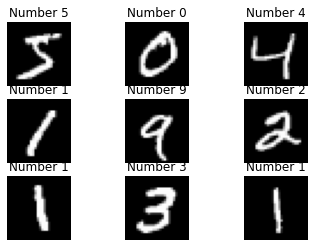

In [153]:
for i in range(9):
  ax = plt.subplot(3,3,i+1) #rows, columns and label
  plt.imshow(xtrain[i], cmap = plt.get_cmap('gray'))
  plt.title("Number {}".format(ytrain[i]))
  plt.axis('off')

In [154]:

ytrain = tf.keras.utils.to_categorical(ytrain)
ytest = tf.keras.utils.to_categorical(ytest)

In [155]:
rows,cols=28,28
xtrain = xtrain.reshape(xtrain.shape[0],rows,cols,1)
xtest = xtest.reshape(xtest.shape[0],rows,cols,1)
inpx = (rows,cols,1)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain/=255.0
xtest/=255.0
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [156]:
model = models.Sequential()
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu')) #Dense(128) is a fully connected layer
model.add(layers.Dense(10,activation='softmax'))

In [157]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])


In [158]:
model.fit(xtrain,ytrain,epochs=10,batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 82s 21ms/step - loss: 0.1789 - accuracy: 0.9426
Epoch 2/10
3750/3750 [==============================] - 82s 22ms/step - loss: 0.0766 - accuracy: 0.9764
Epoch 3/10
3750/3750 [==============================] - 83s 22ms/step - loss: 0.0618 - accuracy: 0.9809
Epoch 4/10
3750/3750 [==============================] - 89s 24ms/step - loss: 0.0549 - accuracy: 0.9839
Epoch 5/10
3750/3750 [==============================] - 97s 26ms/step - loss: 0.0523 - accuracy: 0.9834
Epoch 6/10
3750/3750 [==============================] - 87s 23ms/step - loss: 0.0487 - accuracy: 0.9853
Epoch 7/10
3750/3750 [==============================] - 86s 23ms/step - loss: 0.0463 - accuracy: 0.9856
Epoch 8/10
3750/3750 [==============================] - 87s 23ms/step - loss: 0.0436 - accuracy: 0.9864
Epoch 9/10
3750/3750 [==============================] - 86s 23ms/step - loss: 0.0430 - accuracy: 0.9873
Epoch 10/10
3750/3750 [==============================] - 88s 23m

In [159]:
score = model.evaluate(xtest, ytest)
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0283 - accuracy: 0.9906
Test accuracy: 0.9905999898910522


In [160]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [161]:
model = tf.keras.models.load_model('handwritten.model')

In [162]:
loss , acc = model.evaluate(xtest,ytest)
print(loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.0283 - accuracy: 0.9906
0.02830112911760807


Computer Vision for Detection

In [163]:
import os

1/1 [==============================] - 0s 21ms/step
The number is:  5


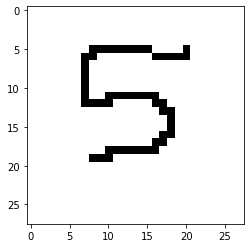

1/1 [==============================] - 0s 24ms/step
The number is:  1


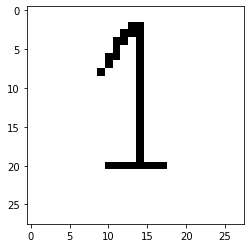

1/1 [==============================] - 0s 22ms/step
The number is:  7


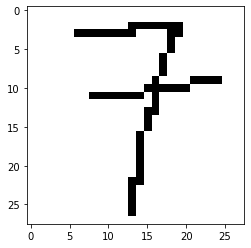

1/1 [==============================] - 0s 22ms/step
The number is:  4


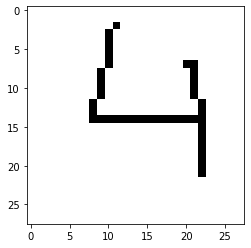

In [165]:
image_number = 1
while os.path.isfile(f"img/digit{image_number}.png"):
    try:
        img = cv2.imread(f"img/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is: ",np.argmax(prediction))
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except Exception as e:
        print(e)
    finally:
        image_number+=1